In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
datahr=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\portfolio\Human resources Analysis\CleanedHRdata.csv")

In [5]:
datahr.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
datahr.set_index("EmpID",inplace=True)

KeyError: "None of ['EmpID'] are in the columns"

In [12]:
datahr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, RM297 to RM1210
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1473 non-null   int64  
 1   AgeGroup                  1473 non-null   object 
 2   Attrition                 1473 non-null   object 
 3   BusinessTravel            1473 non-null   object 
 4   DailyRate                 1473 non-null   int64  
 5   Department                1473 non-null   object 
 6   DistanceFromHome          1473 non-null   int64  
 7   Education                 1473 non-null   int64  
 8   EducationField            1473 non-null   object 
 9   EmployeeCount             1473 non-null   int64  
 10  EmployeeNumber            1473 non-null   int64  
 11  EnvironmentSatisfaction   1473 non-null   int64  
 12  Gender                    1473 non-null   object 
 13  HourlyRate                1473 non-null   int64  
 14  JobInvo

In [13]:
datahr.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'left_company'],
      dtype='object')

## Let's check the attrition %

In [24]:
datahr["Attrition"].value_counts()

No     1236
Yes     237
Name: Attrition, dtype: int64

In [23]:
datahr["Attrition"].value_counts(normalize=True)

#16.0896 employees left, let's see why.

No     0.839104
Yes    0.160896
Name: Attrition, dtype: float64

## Age vs Attrition 

In [25]:
#let's find out if Age (AgeGroup actually) is a significant contribution to the attrition

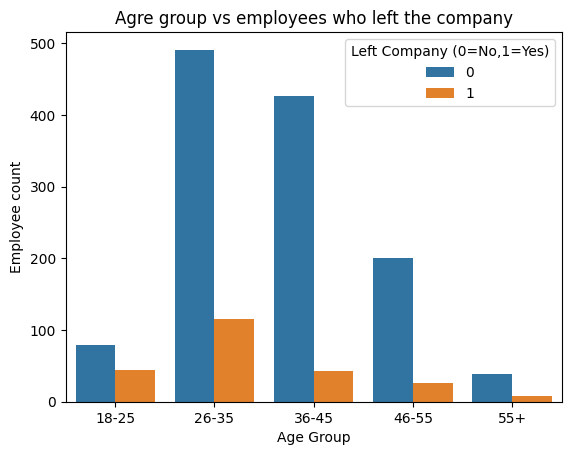

In [30]:
sns.countplot(x="AgeGroup", hue="left_company", data=datahr)
plt.title ("Agre group vs employees who left the company")
plt.xlabel("Age Group")
plt.ylabel("Employee count")
plt.legend(title="Left Company (0=No,1=Yes)")
plt.show()

In [45]:
datahr_perage = datahr.groupby("AgeGroup")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
datahr_perage

,AgeGroup,left_company,percentage
0,18-25,0,64.227642
1,18-25,1,35.772358
2,26-35,0,80.889621
3,26-35,1,19.110379
4,36-45,0,90.851064
5,36-45,1,9.148936
6,46-55,0,88.495575
7,46-55,1,11.504425
8,55+,0,82.978723
9,55+,1,17.021277


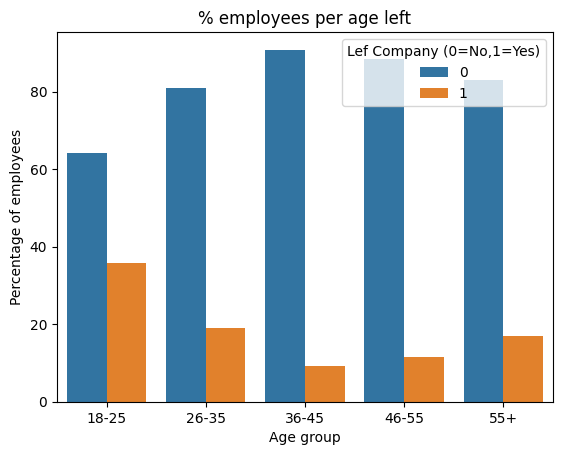

In [46]:
sns.barplot(x="AgeGroup",y="percentage", hue="left_company",data=datahr_perage)
plt.title("% employees per age left")
plt.xlabel("Age group")
plt.ylabel("Percentage of employees")
plt.legend(title="Lef Company (0=No,1=Yes)")
plt.show()



<p>Data shows that employees in age range 18-25 are more likely to leave 35.77, followed by 26-35 (19%) and +55 (17%). But why?</p>

## Business travel vs Attrition 

In [53]:
datahr_pertravel=datahr.groupby("BusinessTravel")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
datahr_pertravel

,BusinessTravel,left_company,percentage
0,Frequently,0,75.179856
1,Frequently,1,24.820144
2,No,0,92.000000
3,No,1,8.000000
4,Rarely,0,85.071770
5,Rarely,1,14.928230


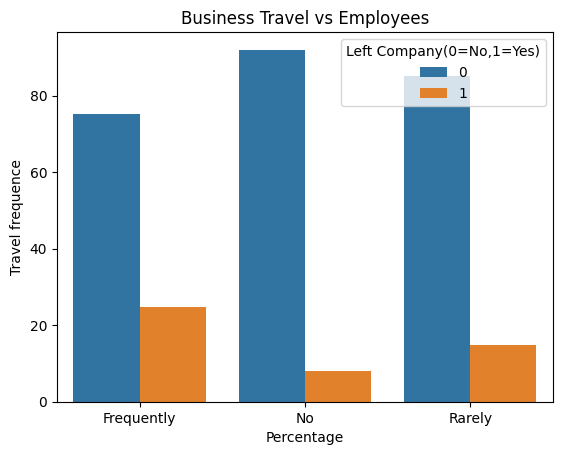

In [54]:
sns.barplot(x="BusinessTravel",y="percentage",hue="left_company",data=datahr_pertravel)
plt.title("Business Travel vs Employees")
plt.xlabel("Percentage")
plt.ylabel("Travel frequence")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

<p> Results show that the more frequent the employees travel for business the more likely they are to leave the company </p>

In [49]:
datahr.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'left_company'],
      dtype='object')